In [ ]:
import numpy as np
import pandas as pd
import torch
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import torchvision
MNIST_train = torchvision.datasets.MNIST('/', download = True, train = True)
MNIST_test = torchvision.datasets.MNIST('/', download = True, train = False)

In [ ]:
x_train = MNIST_train.data.float().unsqueeze(1)
y_train = MNIST_train.targets
x_test = MNIST_test.data.float().unsqueeze(1)
y_test = MNIST_test.targets

tensor(5)


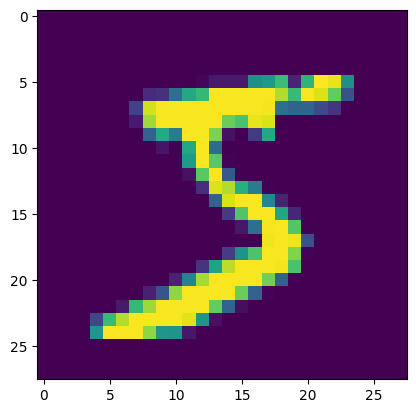

In [ ]:
plt.imshow(x_train[0, 0, :, :])
print(y_train[0])

In [ ]:
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
class LeNet(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=12, kernel_size=3, padding=1) #28
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2) #14

        self.conv2 = torch.nn.Conv2d(
            in_channels=12, out_channels=24, kernel_size=3, padding=0) #12
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2) #6

        self.conv3 = torch.nn.Conv2d(
            in_channels=24, out_channels=48, kernel_size=3, padding=1) #6
        self.act3  = torch.nn.ReLU()
        self.pool3 = torch.nn.AvgPool2d(kernel_size=2, stride=1) #5

        self.conv4 = torch.nn.Conv2d(
            in_channels=48, out_channels=96, kernel_size=3, padding=1) #5
        self.act4  = torch.nn.ReLU()
        self.pool4 = torch.nn.AvgPool2d(kernel_size=2, stride=1) #4

        self.fc1   = torch.nn.Linear(4 * 4 * 96, 120)
        self.act3  = torch.nn.ReLU()

        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()

        self.fc3   = torch.nn.Linear(84, 10)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.act3(x)
        x = self.pool3(x)

        x = self.conv4(x)
        x = self.act4(x)
        x = self.pool4(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x



In [ ]:
lenet = LeNet().to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lenet.parameters(), lr=0.001)

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []
train_loss_history = []
train_accuracy_history = []

for epoch in range(10000):
    order = np.random.permutation(len(x_train))
    for start_index in range(0, len(x_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        x_batch = x_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet.forward(x_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = []
    order = np.random.permutation(len(x_test))
    for start_index in range(0, len(x_test), batch_size):
        indexes = order[start_index : start_index+batch_size]
        temp_batch = x_test[indexes].to(device)
        temp_preds = lenet.forward(temp_batch)
        temp_accuracy = (temp_preds.argmax(dim=1) == y_test[indexes]).float().mean().data.cpu()
        test_preds.append(temp_accuracy)
    test_accuracy = sum(test_preds)/len(test_preds)

    train_preds = []
    order = np.random.permutation(len(x_train))
    for start_index in range(0, len(x_train), batch_size):
        indexes = order[start_index : start_index+batch_size]
        temp_batch = x_train[indexes].to(device)
        temp_preds = lenet.forward(temp_batch)
        temp_accuracy = (temp_preds.argmax(dim=1) == y_train[indexes]).float().mean().data.cpu()
        train_preds.append(temp_accuracy)
    train_accuracy = sum(train_preds)/len(train_preds)

    #test_loss_history.append(loss(test_preds, y_test).data.cpu())
    #train_loss_history.append(loss(train_preds, y_train).data.cpu())
    #train_accuracy = (train_preds.argmax(dim=1) == y_train).float().mean().data.cpu()
    train_accuracy_history.append(train_accuracy)
    #test_accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(test_accuracy)

    print(f'epoch: {epoch}; train accuracy: {train_accuracy :.3}; test accuracy: {test_accuracy :.3}')
    if test_accuracy >= 0.992:
        break

epoch: 0; train accuracy: 0.996; test accuracy: 0.992
epoch: 1; train accuracy: 0.997; test accuracy: 0.992
epoch: 2; train accuracy: 0.997; test accuracy: 0.992
epoch: 3; train accuracy: 0.997; test accuracy: 0.991
epoch: 4; train accuracy: 0.997; test accuracy: 0.992


(-0.2, 4.2, 0.95, 1.0)

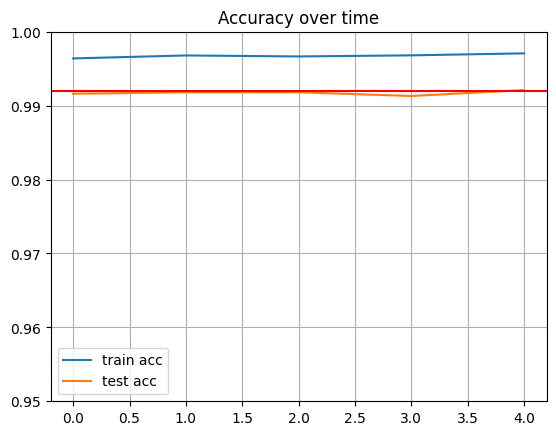

In [ ]:
plt.plot(train_accuracy_history, label='train acc')
plt.plot(test_accuracy_history, label='test acc')
plt.axhline(y=0.992, c='red')
plt.legend()
plt.grid()
plt.title('Accuracy over time')
plt.axis(ymin = 0.95, ymax = 1)